<a href="https://colab.research.google.com/github/OyinOlamide/SCA-Final-Project/blob/main/Heart_Failure_Machine_Learning_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Description

Age: Age in years.

Anaemia: 0 = False, 1 = True

Creatinine_phosphokinase: Level of CPK enzyme in the blood.

Diabetes: 0 = False, 1 = True

Ejection fraction: Percentage of how much blood the left ventricle pumps out with each contraction.

High blood pressure: 0 = False, 1 = True

Platelets: Platelet count in the blood.

Serum creatinine: Measure of creatinine in the blood.

Serum sodium: The measure of sodium in the blood.

Sex: 0 = Woman, 1 = Man

Smoking: 0 = False, 1 = True

Time: Number of days

Death event: 0 = False, 1 = True

In [111]:
from google.colab import files

In [112]:
#necessary imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, plot, init_notebook_mode, iplot

In [113]:
HF=files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (4).csv


In [114]:
import io
HF = pd.read_csv(io.BytesIO(HF["heart_failure_clinical_records_dataset.csv"]))

In [115]:
pip install plotly

In [116]:
pip install -U seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.7/dist-packages (0.11.1)


In [117]:
pip install xgboost

In [118]:
HF.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [119]:
HF.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [120]:
HF.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [121]:
HF.shape

(299, 13)

In [122]:
HF.info

<bound method DataFrame.info of       age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0    75.0        0                       582  ...        0     4            1
1    55.0        0                      7861  ...        0     6            1
2    65.0        0                       146  ...        1     7            1
3    50.0        1                       111  ...        0     7            1
4    65.0        1                       160  ...        0     8            1
..    ...      ...                       ...  ...      ...   ...          ...
294  62.0        0                        61  ...        1   270            0
295  55.0        0                      1820  ...        0   271            0
296  45.0        0                      2060  ...        0   278            0
297  45.0        0                      2413  ...        1   280            0
298  50.0        0                       196  ...        1   285            0

[299 rows x 13 columns]>

In [123]:
HF.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


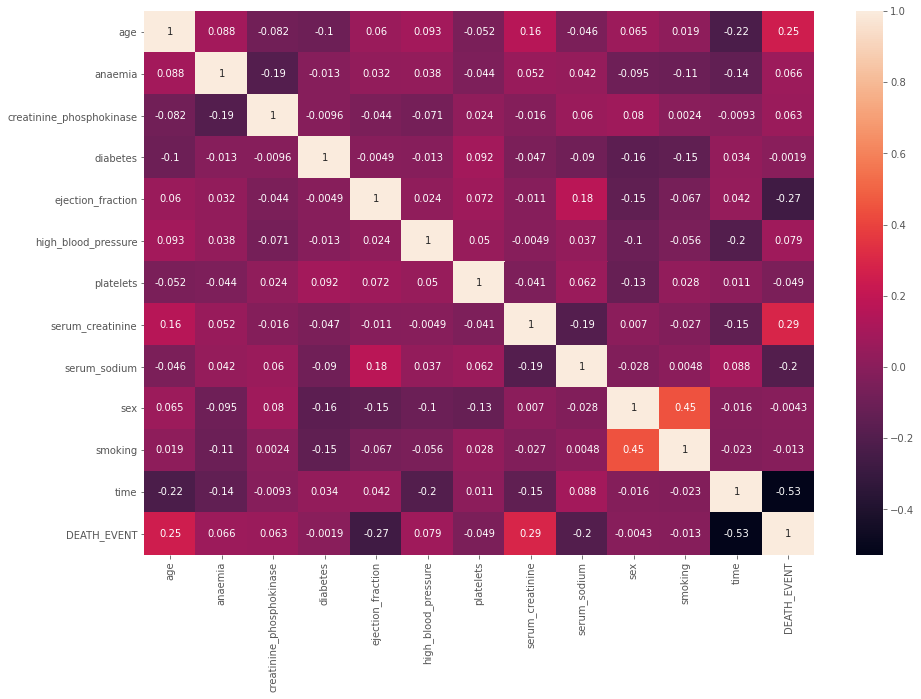

In [124]:
plt.figure(figsize=(15,10))
sns.heatmap(HF.corr(method='pearson'), annot=True)

## Renaming Columns

In [125]:
HF.rename(columns={'creatinine_phosphokinase':'CPK','high_blood_pressure':'HBP', 'ejection_fraction':'EF', 'DEATH_EVENT':'death_event'},inplace=True);
HF.rename(columns=lambda x:x.strip().replace(' ','_'),inplace=True)

In [126]:
HF.columns

Index(['age', 'anaemia', 'CPK', 'diabetes', 'EF', 'HBP', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death_event'],
      dtype='object')

In [127]:
#check for null values

HF.isnull()

,age,anaemia,CPK,diabetes,EF,HBP,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [128]:
HF.isnull().sum()

age                 0
anaemia             0
CPK                 0
diabetes            0
EF                  0
HBP                 0
platelets           0
serum_creatinine    0
serum_sodium        0
sex                 0
smoking             0
time                0
death_event         0
dtype: int64

In [129]:
#Check for duplicated values

HF.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
294    False
295    False
296    False
297    False
298    False
Length: 299, dtype: bool

In [130]:
HF.duplicated().sum()

0

In [131]:
HF.drop_duplicates(subset=None, keep='first', inplace=False)

,age,anaemia,CPK,diabetes,EF,HBP,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [132]:
HF.nunique()

age                  47
anaemia               2
CPK                 208
diabetes              2
EF                   17
HBP                   2
platelets           176
serum_creatinine     40
serum_sodium         27
sex                   2
smoking               2
time                148
death_event           2
dtype: int64

## Exploratory Data Analysis

**The Target Column Is The** **Death** **Event** **Column**


Death Event Column

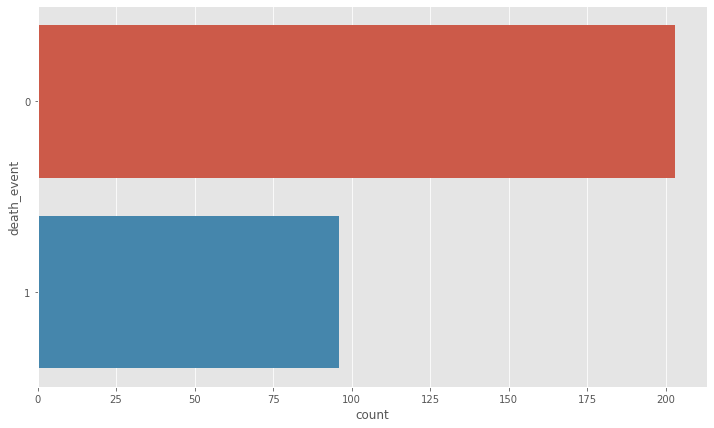

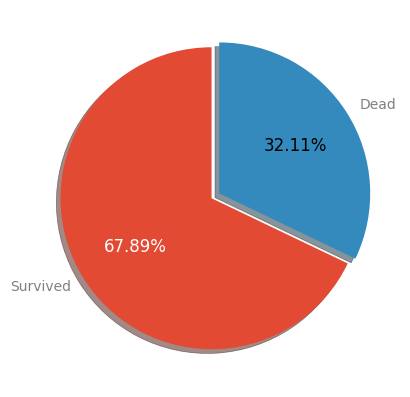

In [133]:
plt.figure(figsize = (12, 7))

sns.countplot(y = 'death_event', data = HF)
plt.show()

values = HF['death_event'].value_counts()
labels = ['Survived', 'Dead']

fig, ax = plt.subplots(figsize = (5, 5), dpi = 100)
explode = (0, 0.06)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 12, color = 'white')
autotexts[1].set_color('black')
plt.show()

**ALL CONTINOUS VALUE**S

Age Column

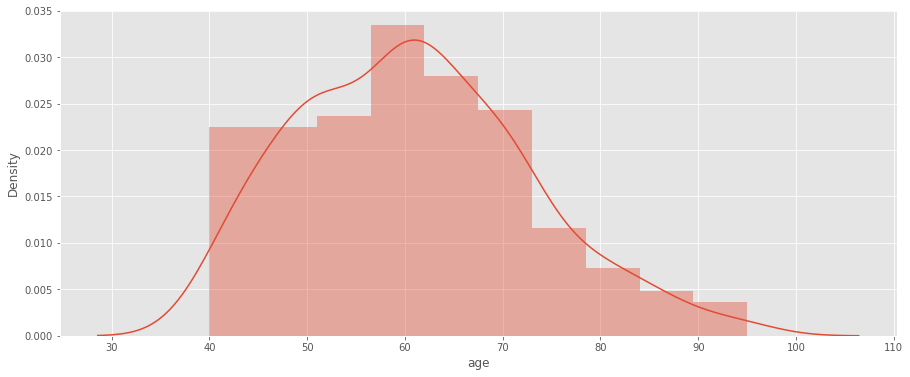

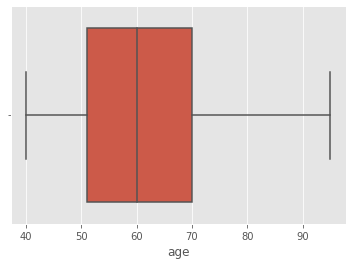

In [134]:
plt.figure(figsize = (15, 6))
plt.style.use('ggplot')

sns.distplot(HF['age'])
plt.show()

#Check for outliers
sns.boxplot(HF['age'])



CPK

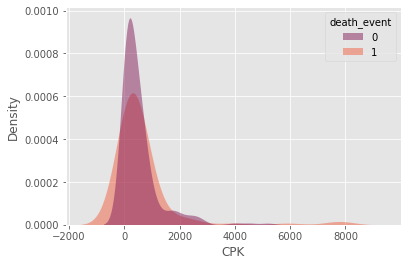

In [135]:
sns.kdeplot(
   data=HF, x="CPK", hue="death_event",
   fill=True, common_norm=False, palette="rocket",
   alpha=.5, linewidth=0,
)


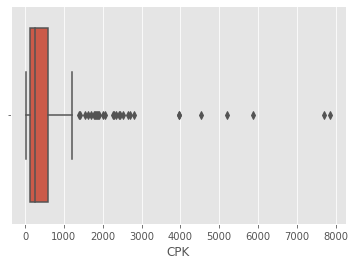

In [136]:
#Check for outliers

sns.boxplot(HF['CPK'])

Ejection Fraction (EF)

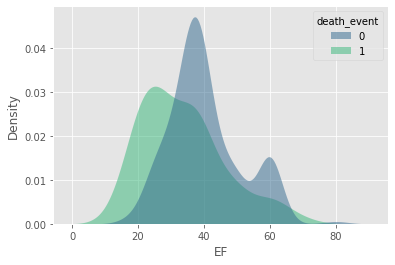

In [137]:
sns.kdeplot(
   data=HF, x="EF", hue="death_event",
   fill=True, common_norm=False, palette="viridis",
   alpha=.5, linewidth=0,
)

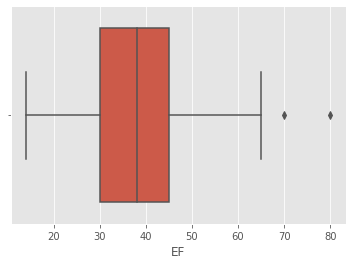

In [138]:
#Check for outliers

sns.boxplot(HF['EF'])

Platelets

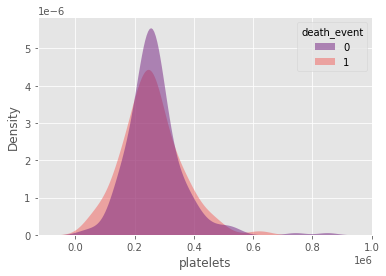

In [139]:
sns.kdeplot(
   data=HF, x="platelets", hue="death_event",
   fill=True, common_norm=False, palette="magma",
   alpha=.5, linewidth=0,
)

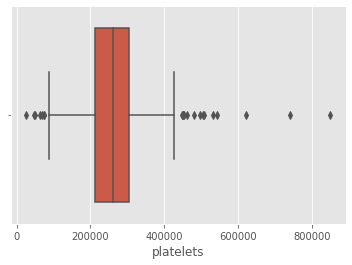

In [140]:
#Check for outliers

sns.boxplot(HF['platelets'])

Serum Sodium

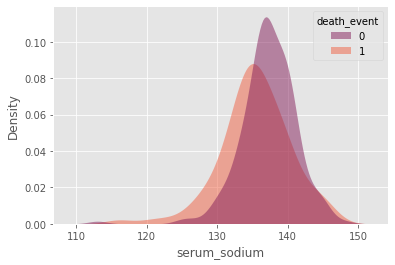

In [141]:
sns.kdeplot(
   data=HF, x="serum_sodium", hue="death_event",
   fill=True, common_norm=False, palette="rocket",
   alpha=.5, linewidth=0,
)

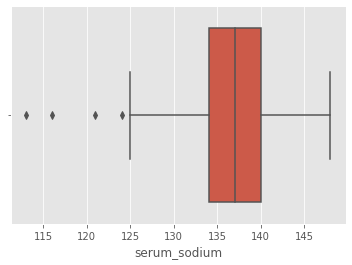

In [142]:
#Check for outliers

sns.boxplot(HF['serum_sodium'])

Serum Creatinine

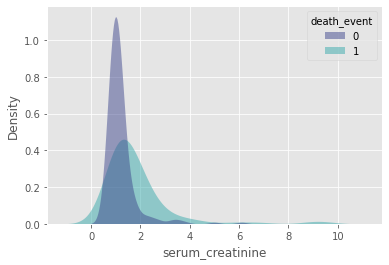

In [143]:
sns.kdeplot(
   data=HF, x="serum_creatinine", hue="death_event",
   fill=True, common_norm=False, palette="mako",
   alpha=.5, linewidth=0,
)

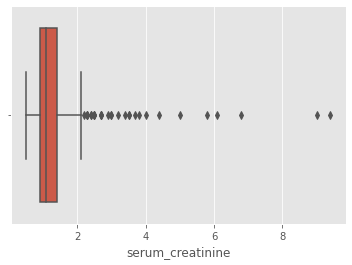

In [144]:
#Check for outliers

sns.boxplot(HF['serum_creatinine'])

Time

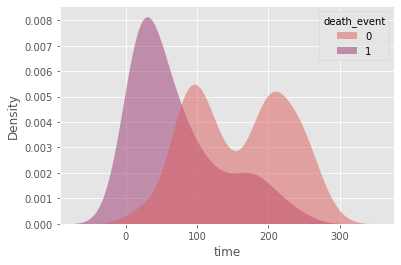

In [145]:
sns.kdeplot(
   data=HF, x="time", hue="death_event",
   fill=True, common_norm=False, palette="flare",
   alpha=.5, linewidth=0,
)

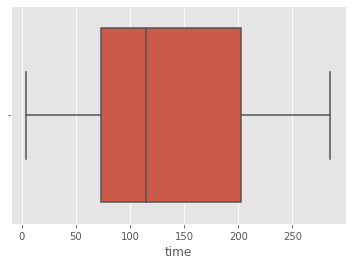

In [146]:
#Check for outliers

sns.boxplot(HF['time'])

**ALL BOOLEAN VALUES**

Anaemia

In [147]:
(HF['anaemia'].value_counts()/sum(HF['anaemia'].value_counts()))*100

0    56.856187
1    43.143813
Name: anaemia, dtype: float64

In [148]:
HF.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [149]:
HF.groupby(['anaemia', 'death_event'])['death_event'].count()

anaemia  death_event
0        0              120
         1               50
1        0               83
         1               46
Name: death_event, dtype: int64

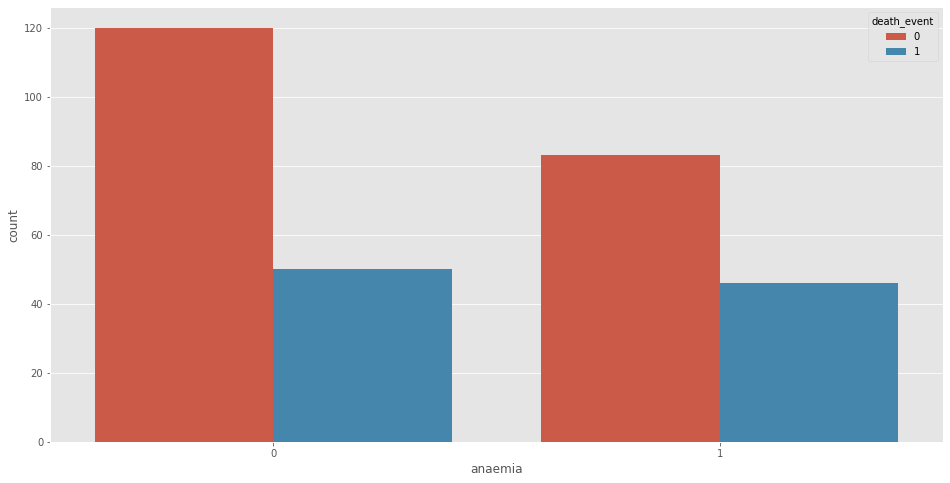

In [150]:
plt.figure(figsize = (16, 8))

sns.countplot('anaemia', hue = 'death_event', data = HF)
plt.show()

Diabetes

In [151]:
(HF['diabetes'].value_counts()/sum(HF['diabetes'].value_counts()))*100

0    58.19398
1    41.80602
Name: diabetes, dtype: float64

In [152]:
HF.diabetes.value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [153]:
HF.groupby(['diabetes', 'death_event'])['death_event'].count()

diabetes  death_event
0         0              118
          1               56
1         0               85
          1               40
Name: death_event, dtype: int64

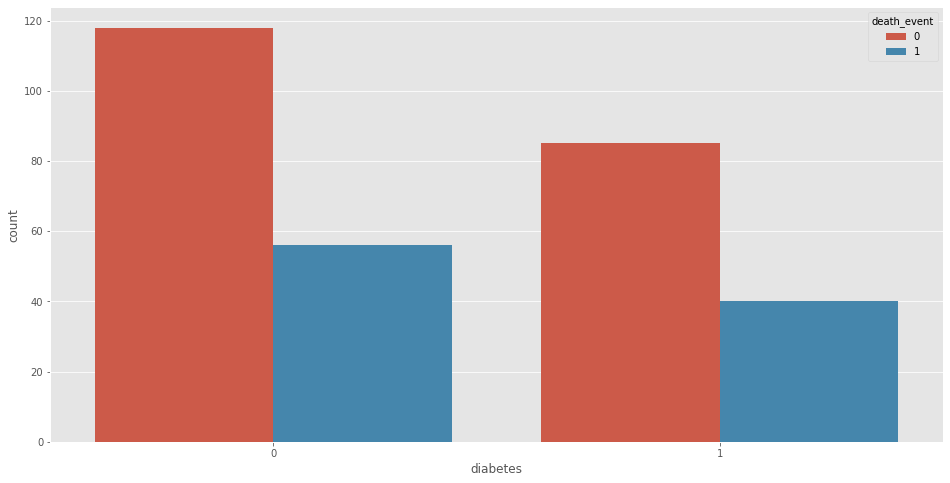

In [154]:
plt.figure(figsize = (16, 8))

sns.countplot('diabetes', hue = 'death_event', data = HF)
plt.show()

Hgh Blood Pressure (HBP)

In [155]:
(HF['HBP'].value_counts()/sum(HF['HBP'].value_counts()))*100

0    64.882943
1    35.117057
Name: HBP, dtype: float64

In [156]:
HF.HBP.value_counts()

0    194
1    105
Name: HBP, dtype: int64

In [157]:
HF.groupby(['HBP', 'death_event'])['death_event'].count()

HBP  death_event
0    0              137
     1               57
1    0               66
     1               39
Name: death_event, dtype: int64

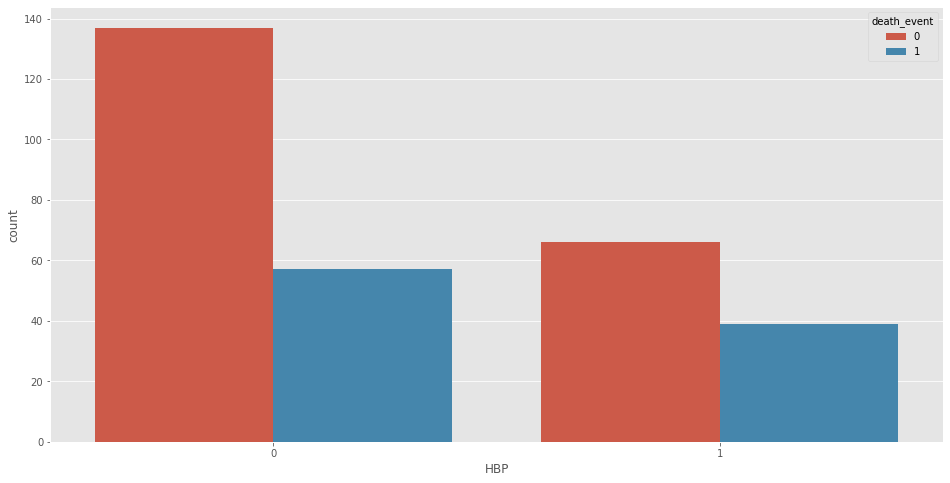

In [158]:
plt.figure(figsize = (16, 8))

sns.countplot('HBP', hue = 'death_event', data = HF)
plt.show()

Sex

In [159]:
(HF['sex'].value_counts()/sum(HF['sex'].value_counts()))*100

1    64.882943
0    35.117057
Name: sex, dtype: float64

In [160]:
HF.sex.value_counts()

1    194
0    105
Name: sex, dtype: int64

In [161]:
HF.groupby(['sex', 'death_event'])['death_event'].count()

sex  death_event
0    0               71
     1               34
1    0              132
     1               62
Name: death_event, dtype: int64

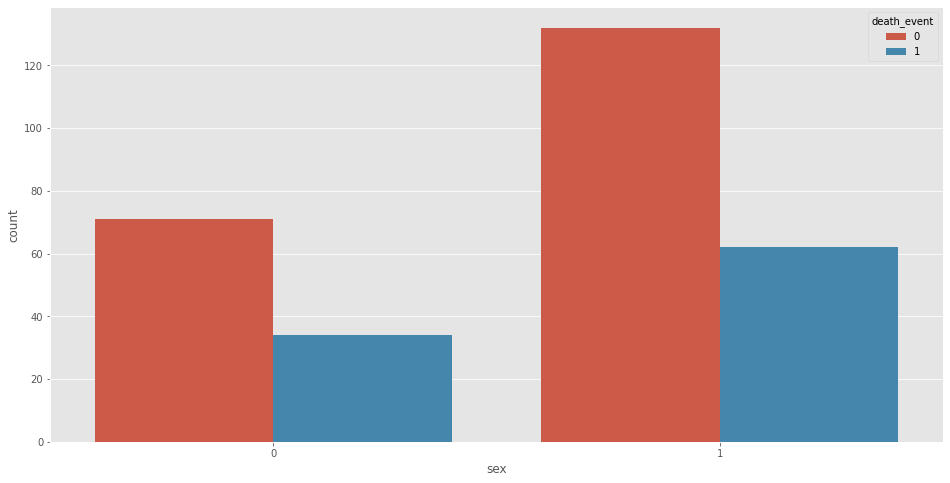

In [162]:
plt.figure(figsize = (16, 8))

sns.countplot('sex', hue = 'death_event', data = HF)
plt.show()

Smoking

In [163]:
(HF['smoking'].value_counts()/sum(HF['smoking'].value_counts()))*100

0    67.892977
1    32.107023
Name: smoking, dtype: float64

In [164]:
HF.smoking.value_counts()

0    203
1     96
Name: smoking, dtype: int64

In [165]:
HF.groupby(['smoking', 'death_event'])['death_event'].count()

smoking  death_event
0        0              137
         1               66
1        0               66
         1               30
Name: death_event, dtype: int64

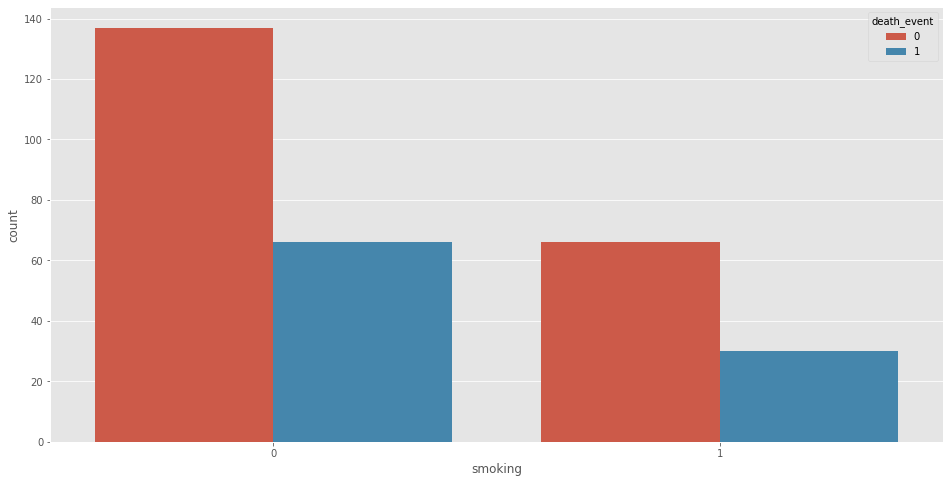

In [166]:
plt.figure(figsize = (16, 8))

sns.countplot('smoking', hue = 'death_event', data = HF)
plt.show()

# **Model Building**

In [167]:
outliers = ['CPK','Platelets','serum_sodium','serum_creatinine']
def outlier_removal(HF,column):
    q1 = HF[column].quantile(0.25)
    q3 = HF[column].quantile(0.75)
    iqr = q3 - q1
    point_low = q1 - 1.5 * iqr
    point_high = q3 + 1.5 * iqr
    clean_HF = HF.loc[(HF[column] >  point_low) & (HF[column] <  point_high)]
    return clean_HF

# clean the dataset by removing outliers
HF_cleaned = outlier_removal(outlier_removal(outlier_removal(HF,'CPK'),'platelets'),'serum_sodium')
print(HF.shape)
print(HF_cleaned.shape)

(299, 13)
(247, 13)


In [168]:
X = HF.drop('death_event',axis=1)
y = HF['death_event']

In [169]:
from imblearn.over_sampling import RandomOverSampler
rs = RandomOverSampler(random_state=42)
X, y = rs.fit_resample(X,y)
X.shape,y.shape

((406, 12), (406,))

In [170]:
features = ['age', 'anaemia', 'CPK', 'diabetes',
       'EF', 'HBP', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
label = ['death_event']
X=HF[features]
y=HF[label]

In [171]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.33, shuffle =True,random_state=42)

In [172]:
F1 = ['time','EF','serum_creatinine','age','serum_sodium','HBP']
predictors = HF[F1]
target = HF["death_event"]

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [173]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train = sc.fit_transform(X_train[F1])
X_test = sc.transform(X_test[F1])

Logistic Regression

In [174]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [175]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [176]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
classification_report = classification_report(y_test, y_pred_log_reg)
print(classification_report)

              precision    recall  f1-score   support

           0       0.77      0.95      0.85        42
           1       0.86      0.50      0.63        24

    accuracy                           0.79        66
   macro avg       0.81      0.73      0.74        66
weighted avg       0.80      0.79      0.77        66



In [177]:
print(accuracy_score(y_test,y_pred_log_reg))

0.7878787878787878


In [178]:
auc = roc_auc_score(y_test, y_pred_log_reg)
auc

0.726190476190476

Random Forest

In [179]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

In [180]:
#random forest
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print("Random Forest Model Accuracy : ",acc_randomforest)
print(classification_report)

Random Forest Model Accuracy :  84.85
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        42
           1       0.86      0.50      0.63        24

    accuracy                           0.79        66
   macro avg       0.81      0.73      0.74        66
weighted avg       0.80      0.79      0.77        66



In [181]:
auc = roc_auc_score(y_pred, y_test)
auc

0.87875

MLPC

In [182]:
from sklearn.neural_network import MLPClassifier
M = MLPClassifier(hidden_layer_sizes=(128,128))

In [183]:
M.fit(X_train,y_train)
y_predM = M.predict(X_test)
print(f1_score(y_test,y_predM))
print(confusion_matrix(y_test,y_predM))
print(classification_report)

0.7555555555555556
[[38  4]
 [ 7 17]]
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        42
           1       0.86      0.50      0.63        24

    accuracy                           0.79        66
   macro avg       0.81      0.73      0.74        66
weighted avg       0.80      0.79      0.77        66



In [184]:
auc = roc_auc_score(y_test, y_predM)
auc

0.8065476190476191

XGB

In [185]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train,y_train)
y_pred1 = model.predict(X_test)
roc_auc_score(y_test, y_pred1)

0.818452380952381

In [186]:
print(classification_report)

              precision    recall  f1-score   support

           0       0.77      0.95      0.85        42
           1       0.86      0.50      0.63        24

    accuracy                           0.79        66
   macro avg       0.81      0.73      0.74        66
weighted avg       0.80      0.79      0.77        66



In [187]:
accuracy = accuracy_score(y_test, y_pred1)
print(accuracy)

0.8484848484848485


Gaussian Naive Bayes

In [188]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [189]:
#gaussian naive bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
acc_naivebayes = round(accuracy_score(y_test, y_pred)*100,2)
print("Gaussian Naive Bayes model accuracy(in %):",acc_naivebayes )
print(classification_report)

Gaussian Naive Bayes model accuracy(in %): 78.79
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        42
           1       0.86      0.50      0.63        24

    accuracy                           0.79        66
   macro avg       0.81      0.73      0.74        66
weighted avg       0.80      0.79      0.77        66



In [190]:
auc = roc_auc_score(y_test, y_pred)
auc

0.726190476190476

SVM

In [191]:
#SVM Classifier

from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)

acc_SVM = round(accuracy_score(y_pred, y_test) * 100, 2)
print("SVM Model Accuracy : ",acc_SVM)
print(classification_report)

SVM Model Accuracy :  78.79
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        42
           1       0.86      0.50      0.63        24

    accuracy                           0.79        66
   macro avg       0.81      0.73      0.74        66
weighted avg       0.80      0.79      0.77        66



In [192]:
auc = roc_auc_score(y_pred, y_test)
auc

0.8131868131868132

DTC

In [193]:
from sklearn.tree import DecisionTreeClassifier

modeldt = DecisionTreeClassifier()

# fit the model with the training data
modeldt.fit(X_train,y_train)

# depth of the decision tree
print('Depth of the Decision Tree :', modeldt.get_depth())

# predict the target on the train dataset
predict_train = modeldt.predict(X_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test*100)
print(classification_report)

Depth of the Decision Tree : 10
accuracy_score on train dataset :  1.0
accuracy_score on test dataset :  84.84848484848484
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        42
           1       0.86      0.50      0.63        24

    accuracy                           0.79        66
   macro avg       0.81      0.73      0.74        66
weighted avg       0.80      0.79      0.77        66



In [194]:
auc = roc_auc_score(y_test, predict_test)
auc

0.818452380952381

Gradient Boostingg Classifier

In [195]:
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm

In [196]:
gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(X_train,y_train)
gradientboost_pred = gradientboost_clf.predict(X_test)
gradientboost_f1 = f1_score(y_test, gradientboost_pred)
gradientboost_f1

acc_GBC= round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_GBC)

print(classification_report)

78.79
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        42
           1       0.86      0.50      0.63        24

    accuracy                           0.79        66
   macro avg       0.81      0.73      0.74        66
weighted avg       0.80      0.79      0.77        66



In [197]:
auc = roc_auc_score(y_pred, y_test)
auc

0.8131868131868132

LGBMC

In [198]:
from sklearn.metrics import precision_score
lgb_clf = lightgbm.LGBMClassifier(max_depth=2, random_state=4)
lgb_clf.fit(X_train,y_train)
lgb_pred = lgb_clf.predict(X_test)
lgb_f1 = f1_score(y_test, lgb_pred)
lgb_precision = precision_score(y_test, lgb_pred)
lgb_f1

0.7999999999999999

In [199]:
acc_lgb = round(accuracy_score(y_test, lgb_pred) * 100, 2)
acc_lgb

86.36

In [200]:
auc = roc_auc_score(y_test, lgb_pred)
auc

0.8392857142857143

In [201]:
# saving the model 
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(lgb_clf, pickle_out) 
pickle_out.close()

In [202]:
!pip install -q pyngrok

!pip install -q streamlit

!pip install -q streamlit_ace

In [203]:
%%writefile app.py
 
import pickle
import streamlit as st
 
# loading the trained model
pickle_in = open('classifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)
 
@st.cache()
  
# defining the function which will make the prediction using the data which the user inputs 
def prediction(time,EF,serum_creatinine,age,serum_sodium,HBP):   
 
    # Pre-processing user input    
    if HBP == "Yes":
        HBP = 1
    else:
        HBP = 0
 
  
    # Making predictions 
    prediction = classifier.predict( 
        [[time,EF,serum_creatinine,age,serum_sodium,HBP]])
     
    if prediction == 0:
        pred = 'Will Survive'
    else:
        pred = 'Will Die'
    return pred
      
  
# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:yellow;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Streamlit Heart Failure Survival Prediction App</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # following lines create boxes in which user can enter data required to make prediction 
    age = st.number_input("What Is Patient's Age?") 
    HBP = st.selectbox('Does Patient Have High Blood Pressure?',("Yes","No"))
    time = st.number_input("How Long Has Patient Had It?") 
    EF = st.number_input("Ejection Fraction In Percentage")
    serum_creatinine = st.number_input("How much creatinine is in the patient's blood?")
    serum_sodium = st.number_input("How much sodium is in the patient's blood?")
    result =""
      
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
        result = prediction(time,EF,serum_creatinine,age,serum_sodium,HBP) 
        st.success('Patient {}'.format(result))
        
     
if __name__=='__main__': 
    main()

Overwriting app.py


In [204]:
!streamlit run app.py &>/dev/null&

In [205]:
!git init

Reinitialized existing Git repository in /content/.git/


In [206]:
!mkdir -p ~/.streamlit/

In [207]:
!echo "\
[server]\n\
headless = true\n\
port = $PORT\n\
enableCORS = false\n\
\n\
" > ~/.streamlit/config.toml

In [208]:
%%writefile requirements.txt

streamlit

Overwriting requirements.txt


In [209]:
%%writefile Procfile

web: sh setup.sh && streamlit run app.py

Overwriting Procfile


In [210]:
!curl https://cli-assets.heroku.com/install-ubuntu.sh | sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1232  100  1232    0     0   5625      0 --:--:-- --:--:-- --:--:--  5625
+ dpkg -s apt-transport-https
+ echo deb https://cli-assets.heroku.com/apt ./
+ dpkg -s heroku-toolbelt
+ true
+ curl https://cli-assets.heroku.com/apt/release.key
+ apt-key add -
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5393  100  5393    0     0  53396      0 --:--:-- --:--:-- --:--:-- 53396
OK
+ apt-get update
Hit:1 https://cli-assets.heroku.com/apt ./ InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.ne